# Setting Everything Up

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 
from sklearn.feature_extraction.text import CountVectorizer

# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

# pd.options.display.float_format = '{:,.2f}'.format

import string

%matplotlib inline

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
#To Download PDFs
from urllib.parse import urljoin

In [7]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [33]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)
library(ggrepel)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Putting together results

For this, I had to go collect the KCSE results and KCPE results one by one
Sources included the Essential statistics release when available and news reports


### For 2015 KCSE results

For this, I got an excel sheet containing all the results for the year, analysed them as below and added them to the document where I have summaries

In [11]:
# df_2015_kcse=pd.read_excel('kcse2015.xlsx', names=['index_num', 'name', 'grade', '101','102', '121', '231', '232','233', '312', '451', 'unnamed','school'])
df_2015_kcse=pd.read_excel('kcse2015.xlsx',header=None, names=['name', 'grade','grade_point', '101','102', '121', '231', '232','233', '312', '451', 'unnamed','school']).reset_index()

df_2015_kcse


,index,name,grade,grade_point,101,102,121,231,232,233,312,451,unnamed,school
0,1100003001,WALE J MAJALIWA,A-,74,101 B+,102 A-,121 A-,231 A,232 B-,233 B+,312 B,451 A-,NaN,KENYATTA HIGH MWATATE
1,1100003002,MURIGI GERALD KIREHU,B+,71,101 B+,102 B,121 A,231 A-,232 B,233 B,312 B-,565 A,NaN,KENYATTA HIGH MWATATE
2,1100003003,MSERI B MWANYIKA,B+,73,101 B,102 B+,121 B+,231 A,232 B+,233 A-,312 B,565 A,NaN,KENYATTA HIGH MWATATE
3,1100003004,IBRAHIM M ABDI,Y,0,101 B+,102 B+,121 Y,231 A,232 A-,233 B+,314 A-,565 A,NaN,KENYATTA HIGH MWATATE
4,1100003005,CHARO SAMUEL MWERI,B+,73,101 B,102 A,121 B+,231 A,232 B+,233 B+,312 B-,565 A,NaN,KENYATTA HIGH MWATATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525719,47981201037,ZEINAB ABDULLAHI ABDI,D-,16,101 D,102 D-,121 E,231 D,233 E,311 D-,314 D,443 D,NaN,MANDERA NORTH PRIVATE
525720,47981201038,QATRA ALI ABDILLE,D+,26,101 D,102 D,121 E,231 D,233 D-,311 B-,314 C,443 C,NaN,MANDERA NORTH PRIVATE
525721,47981201039,BISHARA GEDI KOSHEN,D,21,101 D,102 D-,121 E,231 D,233 D-,311 C,314 D+,443 D-,NaN,MANDERA NORTH PRIVATE
525722,47981201040,ADAN ALI SHABURE,D-,13,101 D-,102 D-,121 E,231 D-,233 E,311 D,314 D-,565 D-,NaN,MANDERA NORTH PRIVATE


### To get the Distribution of Grades 

In [12]:
df_2015_kcse['grade'].value_counts()


# df.groupby('animal').length.mean()

D     78536
D+    78091
C-    73071
C     63961
C+    53826
D-    47938
B-    43769
B     32719
B+    21188
A-    11629
E      5205
Y      5018
X      4005
A      2636
P      2278
W      1344
U       510
Name: grade, dtype: int64

### To get the Highest Grade_point 

In [13]:
df_2015_kcse.sort_values(by='grade_point', ascending=False).head(5)

,index,name,grade,grade_point,101,102,121,231,232,233,312,451,unnamed,school
91997,11200005009,AKEYO TRIZAH NOEL AWUOR,A,84,101 A,102 A,121 A,231 A,232 A,233 A,311 B+,313 A,NaN,LORETO HIGH SCHOOL LIMURU
296280,27552001003,ADALLAH ANDREW OTIENO,A,84,101 A,102 A,121 A,231 A,232 A,233 A,312 A,565 A,NaN,MOI HIGH SCHOOL KABARAK
90768,11200001041,KASIDI Y KITUMBUA,A,84,101 A,102 A,121 A,231 A,232 A,233 A,311 A,565 A,NaN,ALLIANCE HIGH SCHOOL
296283,27552001006,SUMUKWONY DAVID KIGEN,A,84,101 A,102 A,121 A,231 A,232 A,233 A,312 A,451 A,NaN,MOI HIGH SCHOOL KABARAK
373124,36600004007,OWUOR ERIC LIMBE,A,84,101 A,102 A,121 A,231 A,232 A,233 A,312 A,449 A-,NaN,FRIENDS KAMUSINGA


# Create Dataframes for KCPE and KCSE results collected

Created these from the manually collected data from a combination of online sources

In [48]:
df_kcse=pd.read_csv('kcse.csv')
df_kcpe=pd.read_csv('kcpe.csv')

In [50]:
df_kcpe

,year,scored_401to500,over_400_pct,scored_301to400,scored_201to300,scored_101to200,scored_001to100,Number_sat,Highest_Mark,president,pres_change,cabinet_secretary,cabinet_change,election_year,Source1,Source2,Source3
0,2022,9443.0,0.765327,307756.0,619593,296336.0,24.0,1233852.0,431.0,William Ruto,yes,George Magoha,no,yes,https://www.standardmedia.co.ke/education/arti...,NaN,NaN
1,2021,11857.0,0.967371,315275.0,578197,307532.0,1170.0,1225693.0,428.0,Uhuru Kenyatta,no,George Magoha,no,no,https://shahidinews.co.ke/2022/03/28/kcpe-2021...,https://mtotonewsblog.wordpress.com/2022/03/29...,NaN
2,2020,8091.0,0.686125,282090.0,"589,027",299677.0,307.0,1179232.0,433.0,Uhuru Kenyatta,no,George Magoha,no,no,NaN,NaN,NaN
3,2019,9770.0,0.901744,243320.0,566886,262307.0,1173.0,1083456.0,440.0,Uhuru Kenyatta,no,George Magoha,yes,no,https://dc.sourceafrica.net/documents/119796-2...,NaN,NaN
4,2018,11559.0,1.098384,223862.0,574173,240178.0,2592.0,1052364.0,453.0,Uhuru Kenyatta,no,Amina Mohamed,yes,no,https://dc.sourceafrica.net/documents/119796-2...,NaN,NaN
5,2017,9846.0,0.990824,217307.0,529897,234308.0,2360.0,993718.0,455.0,Uhuru Kenyatta,no,Fred Matiangi,no,yes,https://dc.sourceafrica.net/documents/119796-2...,NaN,NaN
6,2016,5190.0,0.550943,207141.0,505552,221438.0,6747.0,942021.0,437.0,Uhuru Kenyatta,no,Fred Matiangi,yes,no,https://www.capitalfm.co.ke/news/2016/12/top-2...,NaN,NaN
7,2015,7000.0,0.746693,201986.0,499568,215614.0,3061.0,937467.0,449.0,Uhuru Kenyatta,no,Jacob Kaimenyi,no,no,https://www.capitalfm.co.ke/news/2015/12/the-t...,https://ebru.co.ke/kcpe-analysis-for-2017-2016...,NaN
8,2014,7000.0,0.797569,201986.0,499568,215614.0,3061.0,877667.0,441.0,Uhuru Kenyatta,no,Jacob Kaimenyi,yes,no,http://alexkuria.blogspot.com/2015/01/2014-ove...,NaN,https://archive.etelej.com/post/kcpe-2014-results
9,2013,NaN,NaN,NaN,NaN,NaN,NaN,839759.0,444.0,Uhuru Kenyatta,yes,Mutula Kilonzo,no,yes,https://www.slideshare.net/erykkoh/appendix-d2...,NaN,NaN


# Reading KCPE and KCSE Data in R

In [51]:
%%R 

df_kcse_r <- read_csv('kcse.csv', show_col_types = FALSE)
df_kcpe_r <- read_csv('kcpe.csv', show_col_types = FALSE)

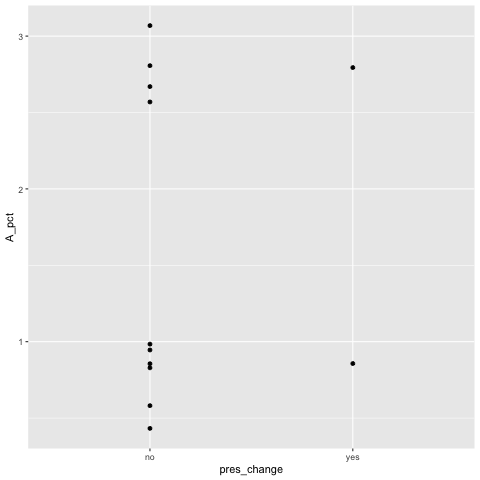

In [52]:
%%R 

ggplot(df_kcse_r, aes(x=pres_change, y=A_pct)) +
    geom_point()

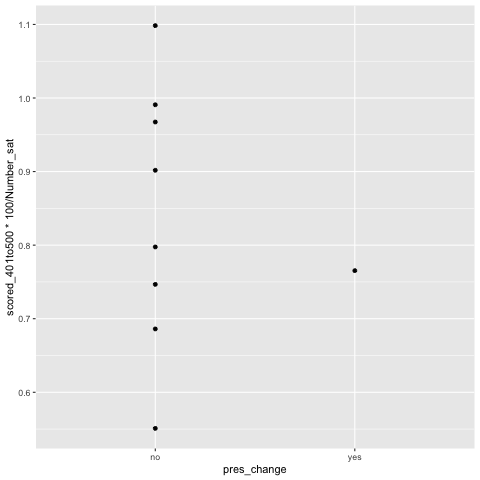

In [53]:
%%R 

ggplot(df_kcpe_r, aes(x=pres_change, y=scored_401to500*100/Number_sat)) +
    geom_point()

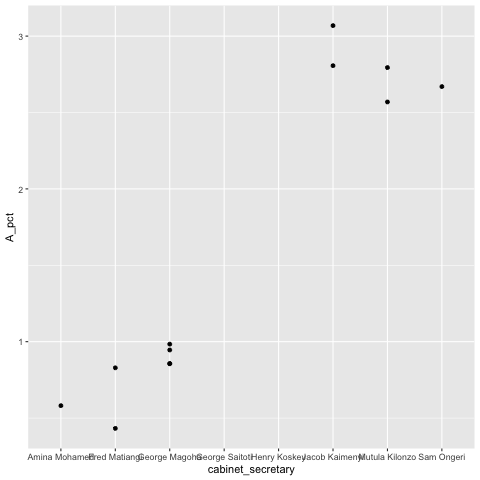

In [54]:
%%R 

ggplot(df_kcse_r, aes(x=cabinet_secretary, y=A_pct)) +
    geom_point()

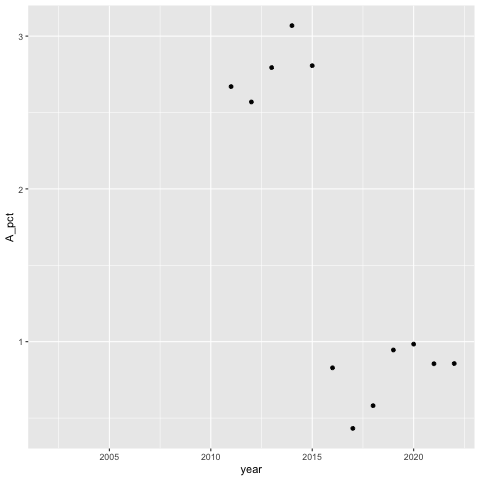

In [55]:
%%R 

ggplot(df_kcse_r, aes(x=year, y=A_pct)) +
    geom_point()

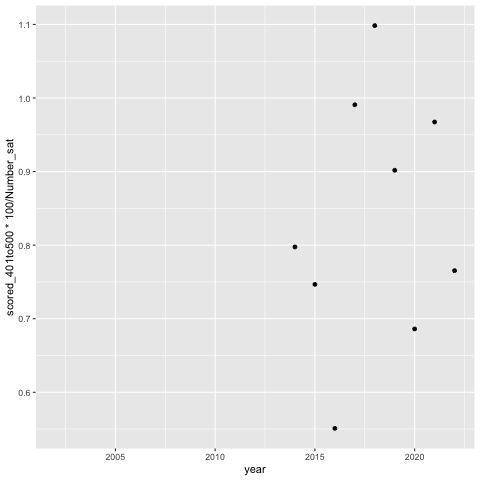

In [56]:
%%R 

ggplot(df_kcpe_r, aes(x=year, y=scored_401to500*100/Number_sat)) +
    geom_point()

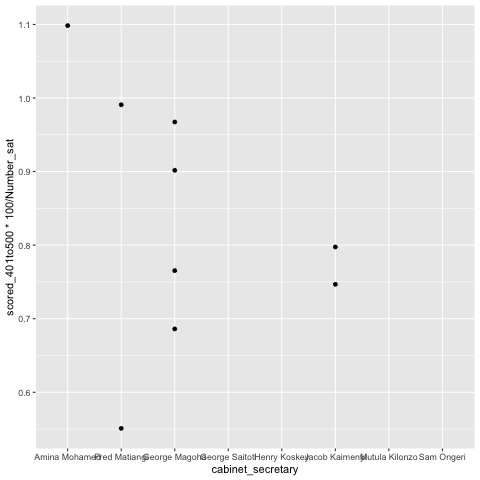

In [57]:
%%R 

ggplot(df_kcpe_r, aes(x=cabinet_secretary, y=scored_401to500*100/Number_sat)) +
    geom_point()

# Are examination results in election years  different from results in other years?

## Starting with KCPE

### Percent scoring over 400 in KCPE

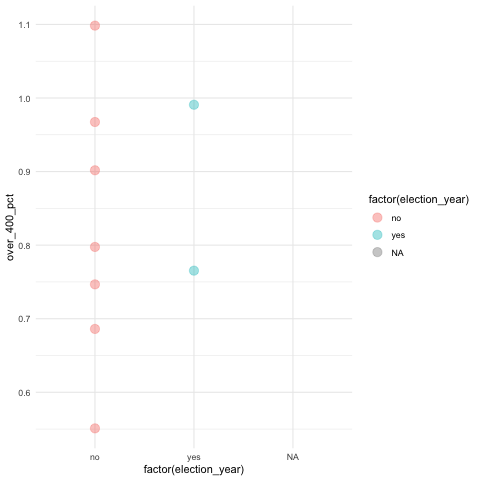

In [58]:
%%R

ggplot(df_kcpe_r) +
    aes(x=factor(election_year), y=over_400_pct, color=factor(election_year)) +
    geom_point(size=4, alpha=.4) +
    theme_minimal()



## For Highest Mark

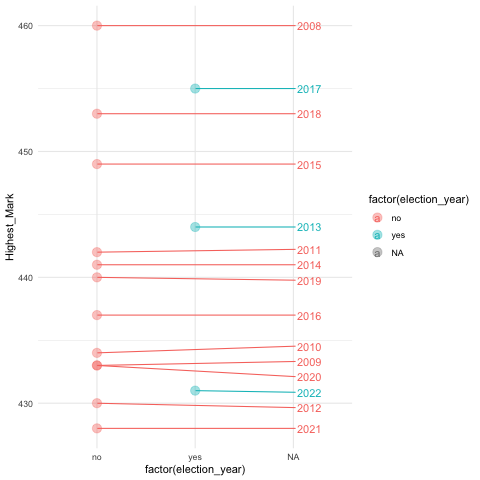

In [59]:
%%R

ggplot(df_kcpe_r) +
    aes(x=factor(election_year), y=Highest_Mark, color=factor(election_year), label = year) +
    geom_point(size=4, alpha=.4) +
    geom_text_repel()+
    theme_minimal()


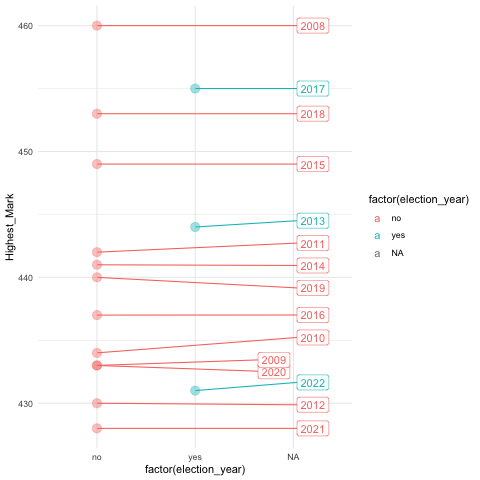

In [60]:
%%R

ggplot(df_kcpe_r) +
    aes(x=factor(election_year), y=Highest_Mark, color=factor(election_year), label = year) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

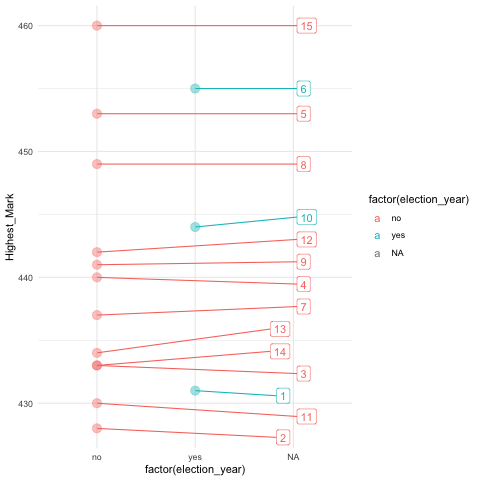

In [61]:
%%R

ggplot(df_kcpe_r) +
    aes(x=factor(election_year), y=Highest_Mark, color=factor(election_year), label = rownames(df_kcpe_r)) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

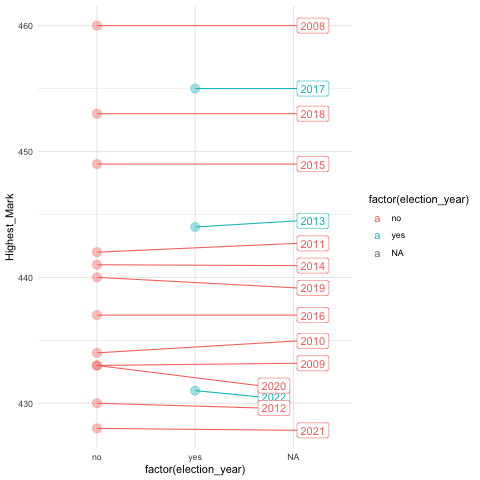

In [62]:
%%R

ggplot(df_kcpe_r) +
    aes(x=factor(election_year), y=Highest_Mark, color=factor(election_year), label = year) +
    geom_point(size=4, alpha=.4) +
    geom_label_repel()+
    theme_minimal()

In [63]:
# %%R

# # 👉 Chart 2
# # Insert code for a ggplot chart below
# ggplot(df_kcpe_r) +
#     aes(x=year, y=scored_401to500*100/Number_sat, color=factor(election_year), alpha=.05) +
#     geom_point() +
#     geom_vline(aes(xintercept=0), color='grey') +facet_wrap(~year)

# Now do a t-test to check if there is a difference

In [66]:
# %%R 

# df_election_2022 = df_kcpe_r %>% filter(year==2022)
# df_election_2021 = df_kcpe_r %>% filter(year==2021)

# t.test(df_election_2022$over_400_pct, df_election_2021$over_400_pct)

In [65]:
%%R 

df_election = df_kcpe_r %>% filter(election_year=='yes')
df_no_election = df_kcpe_r %>% filter(election_year=='no')

t.test(df_election$over_400_pct, df_no_election_2021$over_400_pct)


	One Sample t-test

data:  df_election$over_400_pct
t = 7.7879, df = 1, p-value = 0.0813
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.5545335  2.3106847
sample estimates:
mean of x 
0.8780756 



The p-value in this case is small, indicating there is a statistically significant difference between examination results in election years compared to other years

# For KCSE

In [67]:
df_kcse

,year,candidates,min_uni_Cplus_scored,min_uni_Cplus_pct,scored_A,scored_Aminus,total_A,A_pct,Bplus,Bplain,Bminus,Cplus,Cplain,Cminus,Dplus,Dplain,Dminus,scored_E,special_needs_Cplus,special_needs_total,exams cancelled,subjects_improving,top_grade,election,president,pres_change,cabinet_secretary,cabinet_change,date,Source1,Source2
0,2022,881416,173345,19.666650,1146.0,6407,7553.0,0.856917,15682,31303,48719,70088,95154,119068,135021,155480,167758,30822.0,190.0,NaN,NaN,17.0,NaN,yes,William Ruto,yes,George Magoha,no,NaN,https://www.citizen.digital/news/2022-kcse-res...,https://educationnewshub.co.ke/2022-kcse-resul...
1,2021,831026,145776,17.541689,1138.0,"5,973",7111.0,0.855689,"13,463","25,035","39,683","59,843","81,345","99,406","116,355","145,916","187,264",46151.0,NaN,NaN,441.0,11.0,NaN,no,Uhuru Kenyatta,no,George Magoha,no,NaN,https://sokodirectory.com/2022/04/kcse-2021-ov...,NaN
2,2020,743299,143140,19.257392,893.0,6420,7313.0,0.983857,14427,25207,38194,57999,85458,109454,117898,121942,137361,28046.0,NaN,NaN,287.0,NaN,87.000,no,Uhuru Kenyatta,no,George Magoha,no,NaN,https://www.pd.co.ke/news/kcse-2020-overall-pe...,NaN
3,2019,679222,125746,18.513240,627.0,5796,6423.0,0.945641,13366,24478,35340,46139,63102,83358,101687,137713,152339,29318.0,NaN,1309.0,NaN,NaN,87.159,no,Uhuru Kenyatta,no,George Magoha,yes,NaN,https://educationnewshub.co.ke/kcse-2019-mean-...,NaN
4,2018,"642,204",90377,14.072943,315.0,3417,3732.0,0.581124,8268,16403,26156,35818,NaN,NaN,NaN,NaN,NaN,NaN,88.0,1499.0,NaN,14.0,87.640,no,Uhuru Kenyatta,no,Amina Mohamed,yes,NaN,https://www.schoolsnetkenya.com/an-analysis-of...,NaN
5,2017,660204,70073,10.613841,142.0,2714,2856.0,0.432594,7344,12628,19385,27860,40474,61040,88447,135550,179381,35356.0,NaN,NaN,NaN,13.0,87.011,yes,Uhuru Kenyatta,no,Fred Matiangi,no,NaN,https://kenyapage.net/education/kcse-results-2...,NaN
6,2016,577253,88928,15.405377,141.0,4645,4786.0,0.829099,10975,17216,23745,32207,44792,61026,80951,112135,149929,33399.0,NaN,NaN,NaN,NaN,NaN,no,Uhuru Kenyatta,no,Fred Matiangi,yes,NaN,https://kenyapage.net/education/kcse-results-2...,https://kcpe-kcse.com/kcse-2016-results/
7,2015,525724,169492,32.239730,2685.0,12069,14754.0,2.806416,21927,33460,44581,54770,64913,74115,79157,79555,48658,5350.0,NaN,NaN,5101.0,NaN,NaN,no,Uhuru Kenyatta,no,Jacob Kaimenyi,no,NaN,https://kcseresults2015.wordpress.com/2016/03/...,https://kcpe-kcse.com/kcse-2016-results/kcse-2...
8,2014,483630,149717,30.956930,3073.0,11768,14841.0,3.068668,19814,29319,38315,47428,58688,70677,76198,73501,47716,5636.0,180.0,1090.0,2975.0,15.0,NaN,no,Uhuru Kenyatta,no,Jacob Kaimenyi,yes,NaN,https://archive.etelej.com/post/kcse-2014-resu...,https://weeklycitizennewspaper.blogspot.com/20...
9,2013,446696,123365,27.617216,2722.0,9759,12481.0,2.794070,17013,24656,30864,38351,48571,60763,71803,78177,55793,7042.0,NaN,NaN,NaN,14.0,NaN,yes,Uhuru Kenyatta,yes,Mutula Kilonzo,no,NaN,https://studylib.net/doc/9912410/2014-kcse-exa...,NaN


## Percent scoring A or A minus in KCSE

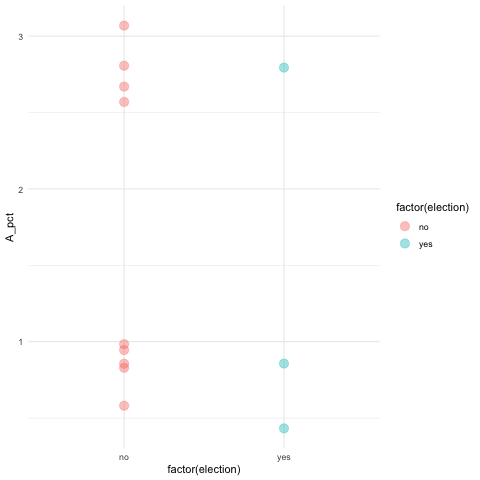

In [71]:
%%R

ggplot(df_kcse_r) +
    aes(x=factor(election), y=A_pct, color=factor(election)) +
    geom_point(size=4, alpha=.4) +
    theme_minimal()

In [73]:
%%R 

df_election = df_kcse_r %>% filter(election=='yes')
df_no_election = df_kcse_r %>% filter(election=='no')

t.test(df_election$A_pct, df_no_election_2021$A_pct)


	One Sample t-test

data:  df_election$A_pct
t = 1.8728, df = 2, p-value = 0.202
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -1.766122  4.488509
sample estimates:
mean of x 
 1.361193 



The p value in this case is higher than 0.1, meaning there is no statistical difference between KCSE results in the different years 